In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import json

In [6]:
file = open('dataset.json', encoding="utf8")

In [7]:
type(file)

_io.TextIOWrapper

In [8]:
Frame_1 = pd.read_json(file)

In [9]:
ap = []

In [10]:
for i in np.arange(0,len(Frame_1),1):
    for k in np.arange(0,len(pd.DataFrame.from_dict(Frame_1['posts'].ix[i])),1):
        sl_ = {'id':Frame_1.ix[i]['id'],
               'confidence':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['annotations'].ix[k]['cropHintsAnnotation']['cropHints'][0]['confidence'],
               #'imFra':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['annotations'].ix[k]['cropHintsAnnotation']['cropHints'][0]['importanceFraction'],
               'blue':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['annotations'].ix[k]['imagePropertiesAnnotation']['dominantColors']['colors'][0]['color']['blue'],
               'green':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['annotations'].ix[k]['imagePropertiesAnnotation']['dominantColors']['colors'][0]['color']['green'],
               'red':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['annotations'].ix[k]['imagePropertiesAnnotation']['dominantColors']['colors'][0]['color']['red'],
               'piFra':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['annotations'].ix[k]['imagePropertiesAnnotation']['dominantColors']['colors'][0]['pixelFraction'],
               'score':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['annotations'].ix[k]['imagePropertiesAnnotation']['dominantColors']['colors'][0]['score'],
               #'descrip':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['annotations'].ix[k]['labelAnnotations'][0]['description'],
               #'score_d':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['annotations'].ix[k]['labelAnnotations'][0]['score'],
               'adult':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['annotations'].ix[k]['safeSearchAnnotation']['adult'],
               'medical':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['annotations'].ix[k]['safeSearchAnnotation']['medical'],
               'spoof':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['annotations'].ix[k]['safeSearchAnnotation']['spoof'],
               'violence':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['annotations'].ix[k]['safeSearchAnnotation']['violence'],
               'comments':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['instagram'].ix[k]['comments']['count'],
               #'comments_disabled':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['instagram'].ix[k]['comments_disabled'],
               #'is_video':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['instagram'].ix[k]['is_video'],
               'likes':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['instagram'].ix[k]['likes']['count'],
               'thumbnail_src':pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['instagram'].ix[k]['thumbnail_src']              
              }
        
        try:
            sl_['descrip'] = pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['annotations'].ix[k]['labelAnnotations'][0]['description']
        except KeyError:
            sl_['descrip'] = 'Na'
            
        try:
            sl_['score_d'] = pd.DataFrame.from_dict(Frame_1['posts'].ix[i])['annotations'].ix[k]['labelAnnotations'][0]['score']
        except KeyError:
            sl_['score_d'] = 0.9
        
        ap.append(sl_)

In [11]:
data = pd.DataFrame(ap)

In [13]:
le.fit(data['descrip'])
data['description'] = le.transform(data['descrip'])

In [10]:
data['adult'].value_counts()

VERY_UNLIKELY    4448
UNLIKELY          536
POSSIBLE           38
LIKELY              8
VERY_LIKELY         2
Name: adult, dtype: int64

In [14]:
data['adult'][data['adult'] == 'VERY_UNLIKELY'] = 1

In [15]:
data['adult'][data['adult'] == 'UNLIKELY'] = 2

In [16]:
data['adult'][data['adult'] == 'POSSIBLE'] = 3

In [17]:
data['adult'][data['adult'] == 'LIKELY'] = 4

In [18]:
data['adult'][data['adult'] == 'VERY_LIKELY'] = 5

In [16]:
data['medical'].value_counts()

VERY_UNLIKELY    4502
UNLIKELY          515
POSSIBLE           15
Name: medical, dtype: int64

In [19]:
data['medical'][data['medical'] == 'VERY_UNLIKELY'] = 1

In [20]:
data['medical'][data['medical'] == 'UNLIKELY'] = 2

In [21]:
data['medical'][data['medical'] == 'POSSIBLE'] = 3

In [22]:
data['medical'][data['medical'] == 'LIKELY'] = 4

In [23]:
data['medical'][data['medical'] == 'VERY_LIKELY'] = 5

In [22]:
data['spoof'].value_counts()

VERY_UNLIKELY    4791
UNLIKELY          227
POSSIBLE           11
LIKELY              2
VERY_LIKELY         1
Name: spoof, dtype: int64

In [24]:
data['spoof'][data['spoof'] == 'VERY_UNLIKELY'] = 1

In [25]:
data['spoof'][data['spoof'] == 'UNLIKELY'] = 2

In [26]:
data['spoof'][data['spoof'] == 'POSSIBLE'] = 3

In [27]:
data['spoof'][data['spoof'] == 'LIKELY'] = 4

In [28]:
data['spoof'][data['spoof'] == 'VERY_LIKELY'] = 5

In [28]:
data['violence'].value_counts()

VERY_UNLIKELY    3483
UNLIKELY         1512
POSSIBLE           31
LIKELY              5
VERY_LIKELY         1
Name: violence, dtype: int64

In [29]:
data['violence'][data['violence'] == 'VERY_UNLIKELY'] = 1

In [30]:
data['violence'][data['violence'] == 'UNLIKELY'] = 2

In [31]:
data['violence'][data['violence'] == 'POSSIBLE'] = 3

In [32]:
data['violence'][data['violence'] == 'LIKELY'] = 4

In [33]:
data['violence'][data['violence'] == 'VERY_LIKELY'] = 5

In [34]:
data.drop('descrip', axis=1).to_csv('data.csv', sep = ',', encoding = 'utf-8', index = True)

In [7]:
data = pd.read_csv('data.csv', index_col = 'Unnamed: 0')

In [3]:
import numpy as np

In [43]:
import keras

Using TensorFlow backend.


In [44]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [45]:
model = VGG16(weights='imagenet', include_top=False)

In [46]:
img_path = 'images/7.jpg'

In [47]:
img = image.load_img(img_path, target_size=(224, 224))

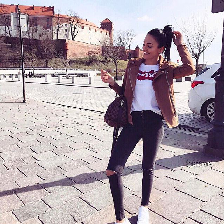

In [48]:
img

In [49]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [50]:
model.predict(x).flatten()

array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
        8.86222267,  0.        ], dtype=float32)

In [35]:
idx = data.drop([1901,1989,2004,2011,2012,3039,4086,4990]).index.values

In [57]:
features = []

In [58]:
for i in idx:
    img_path = 'images/'+str(i)+'.jpg'
    img = image.load_img(img_path, target_size=(224, 224))
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    features.append(model.predict(x).flatten())

In [60]:
pd.DataFrame(features, index=idx).to_csv('insta_image_features.csv', sep = ',', encoding = 'utf-8', index = True)

In [61]:
pd.DataFrame(features, index=idx).head()

,0,1,2,3,4,5,6,7,8,9,...,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.423975,0.000000,0.0,0.0,0.000000,47.075577,0.000000,0.0,11.958194,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.858001,0.0,0.0,0.000000,0.000000,104.651154,0.0,47.174999,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.818370,0.000000,0.0,0.0,0.000000,36.873768,0.000000,0.0,3.657092,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,8.930202
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,4.961601,0.000000,0.000000,0.0,0.000000,0.000000


In [8]:
X_img = pd.read_csv('insta_image_features.csv', index_col = 'Unnamed: 0')